<a href="https://colab.research.google.com/github/akitim/comptech-winter-school-2022_covid19-prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install httpx

In [12]:
import pandas as pd
import itertools
from scipy.signal import savgol_filter
from tqdm.notebook import tqdm
import json
from collections import defaultdict
import pickle
from matplotlib import pyplot as plt
import pickle
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
import statsmodels.api as sm
from datetime import date, timedelta
import pickle
import httpx
import json
import warnings
# warnings.filterwarnings('ignore')

In [14]:
# def get_df():
# #   import httpx
#   data = httpx.get("https://storage.yandexcloud.net/covid-19/people_structure.csv").content
#   return pd.read_csv(data)

In [22]:
path = "https://storage.yandexcloud.net/covid-19/people_structure.csv"
data = pd.read_csv(path)
data.sample(10)

,Unnamed: 0,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
36564,37307,Cyprus,2021-11-15,127684.0,648.0,248.143,588.0,1.0,1.571,142503.669,723.210,276.944,656.246,1.116,1.754,1.39,14.0,15.625,88.0,98.214,NaN,NaN,NaN,NaN,66696.0,15634019.0,17448.585,74.437,54344.0,60.651,0.0046,219.0,tests performed,NaN,NaN,NaN,NaN,NaN,2554.0,NaN,NaN,NaN,NaN,2850.0,441.0,0.049,46.30,896005.0,127.657,37.3,13.416,8.563,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.40,80.98,0.887,NaN,NaN,NaN,NaN
140455,144879,Trinidad and Tobago,2021-07-03,33313.0,160.0,177.714,879.0,13.0,11.286,23737.792,114.011,126.634,626.348,9.263,8.042,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,830.0,234005.0,166.745,0.591,1174.0,0.837,0.1514,6.6,people tested,325549.0,219963.0,105586.0,NaN,5958.0,8246.0,23.2,15.67,7.52,NaN,5876.0,3030.0,0.216,88.89,1403374.0,266.886,36.2,10.014,5.819,28763.071,NaN,228.467,10.97,NaN,NaN,89.443,3.00,73.51,0.796,NaN,NaN,NaN,NaN
19118,19861,Botswana,2020-08-30,1633.0,71.0,46.429,6.0,3.0,0.429,681.200,29.617,19.368,2.503,1.251,0.179,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1796.0,0.749,0.0259,38.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,2397240.0,4.044,25.8,3.941,2.242,15807.374,NaN,237.372,4.81,5.7,34.4,NaN,1.80,69.59,0.735,NaN,NaN,NaN,NaN
50083,52310,French Polynesia,2020-05-06,60.0,0.0,0.286,NaN,NaN,NaN,212.364,0.000,1.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282534.0,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66,NaN,NaN,NaN,NaN,NaN
10746,11489,Bahrain,2020-07-12,32941.0,471.0,510.571,108.0,4.0,1.571,18841.786,269.405,292.040,61.774,2.288,0.899,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7639.0,656659.0,375.600,4.369,7787.0,4.454,0.0656,15.3,units unclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.44,1748295.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29,0.852,NaN,NaN,NaN,NaN
43277,44020,Equatorial Guinea,2021-01-28,5492.0,0.0,18.143,86.0,0.0,0.000,3787.871,0.000,12.513,59.315,0.000,0.000,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1449891.0,45.194,22.4,2.846,1.752,22604.873,NaN,202.812,7.78,NaN,NaN,24.640,2.10,58.74,0.592,NaN,NaN,NaN,NaN
78724,81694,Lesotho,2021-03-06,10523.0,0.0,4.571,307.0,0.0,2.143,4873.864,0.000,2.117,142.191,0.000,0.992,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2159067.0,73.562,22.2,4.506,2.647,2851.153,59.6,405.126,3.94,0.4,53.9,2.117,NaN,54.33,0.5

In [49]:
def change_col_name(df):
    df.columns = ['date', 'country', 'new_cases_sm', 'fully_vaccinated']
    return df

In [50]:
df =\
(data
 .loc[: , ['date', 'location', 'new_cases_smoothed', 'people_fully_vaccinated']]
 .loc[data['location'] == 'Russia', :]
 .dropna()
 .pipe(change_col_name)
 .assign(date = pd.to_datetime(data['date']).dt.date)
 .reset_index()
 .set_index('date')
 .sort_index(ascending=False)
 .drop('index', axis=1)
)
df

,country,new_cases_sm,fully_vaccinated
date,,,
2022-02-01,Russia,105687.571,69967776.0
2022-01-31,Russia,97477.000,69815128.0
2022-01-30,Russia,89119.857,69704859.0
2022-01-29,Russia,80887.143,69581579.0
2022-01-28,Russia,72953.571,69505726.0
...,...,...,...
2021-03-06,Russia,10945.571,1501746.0
2021-03-05,Russia,11017.000,1393676.0
2021-03-04,Russia,11024.000,1309569.0


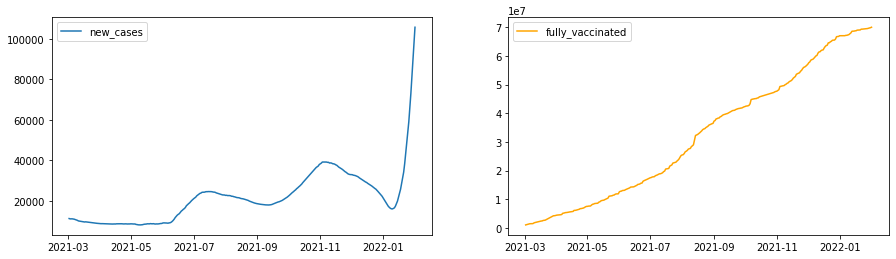

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs
ax1.plot(df['new_cases_sm']);
ax1.legend(loc='best', labels=['new_cases']);
ax2.plot(df['fully_vaccinated'], color='orange');
ax2.legend(loc='best', labels=['fully_vaccinated']);